# Trading View Extract

In [28]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('BINANCE_SOLUSDT.P, 60_e652a.csv')

# Dropping rows
drop_columns = ['Plot','Plot.1']
df = df.drop(columns=drop_columns)

nan_columns = ['Leading Span A', 'Leading Span B']
df = df.dropna(subset=nan_columns, how='all')

# Display the first few rows of the DataFrame
df

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


# Snipet Visualization

In [3]:
df_tail = df.tail(200)
df_tail

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
25776,1733788800,216.66,221.02,213.58,217.74,237.3525,238.610,NaN,226.020359
25777,1733792400,217.75,219.42,215.80,218.94,236.4425,238.450,NaN,226.020359
25778,1733796000,218.94,218.97,212.84,212.92,235.8375,237.845,NaN,226.020359
25779,1733799600,212.91,215.86,206.95,215.83,235.4975,237.505,NaN,226.020359
25780,1733803200,215.83,216.43,212.20,216.14,235.1125,237.120,NaN,226.020359
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.280,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.280,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.280,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.280,NaN,224.803585


C:\Users\user\AppData\Local\Temp\ipykernel_15564\3626288917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime


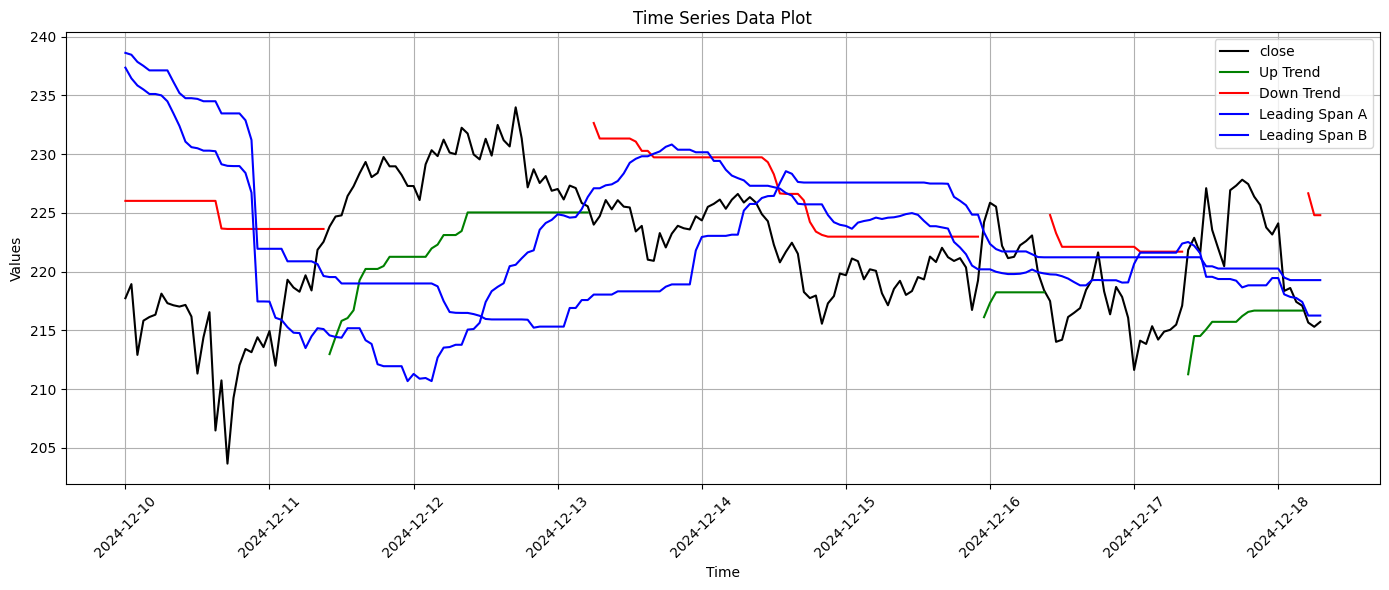

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_tail is a pandas DataFrame
df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime

# Define custom colors for specific series
color_map = {
    'close': 'black',
    'Up Trend': 'green',
    'Down Trend': 'red',
    'Leading Span A': 'blue',
    'Leading Span B': 'blue'
}

# Plotting all columns except 'high' and 'low'
plt.figure(figsize=(14, 6))

for column in ['close', 'Up Trend', 'Down Trend', 'Leading Span A', 'Leading Span B']:
    if column in color_map:
        plt.plot(df_tail['time'], df_tail[column], label=column, color=color_map[column])
    else:
        plt.plot(df_tail['time'], df_tail[column], label=column)  # Default color for other series

plt.title('Time Series Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Backtest Stats

In [70]:
df_backtest = df.copy()
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


In [71]:
# Set 'super_trend' to 1 if 'Down Trend' is NaN, and to 0 if 'Up Trend' is NaN
df_backtest['super_trend'] = np.where(df_backtest['Down Trend'].isna(), 1, 
                                      np.where(df_backtest['Up Trend'].isna(), -1, np.nan))

# Display the DataFrame to verify
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966,-1.0
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169,-1.0
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752,-1.0
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752,-1.0
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752,-1.0
...,...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN,1.0
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN,1.0
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539,-1.0
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585,-1.0


In [72]:
import numpy as np

# Define a function to determine the action suggestion for each row
def determine_action(row):
    if row['super_trend'] == 1 and row['open'] > max(row['Leading Span A'], row['Leading Span B']):
        return 1
    elif row['super_trend'] == -1 and row['open'] < min(row['Leading Span A'], row['Leading Span B']):
        return -1
    return 0

# Apply the function row-wise to the DataFrame
df_backtest['action_suggestion'] = df_backtest.apply(determine_action, axis=1)

# Display the DataFrame to verify
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend,action_suggestion
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966,-1.0,-1
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169,-1.0,-1
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752,-1.0,-1
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752,-1.0,-1
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN,1.0,0
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN,1.0,0
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539,-1.0,0
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585,-1.0,-1


CASE

super_trend action_suggestion real_action
1   1   long
1   1   hold
1   0   hold
1   0   hold
-1  -1  close
-1  -1  short
-1  0   hold
1   0   close
1   1   long

In [ ]:
# # Define real action
# df_backtest['real_action'] = 'hold'
# df_backtest['real_action'] = 'close' if df_backtest['super_trend'] =! df_backtest['super_trend'].shift(1)
# df_backtest['real_action'] = 'short' if df_backtest['action_suggestion'] == -1 and df_backtest['real_action'].shift(1) == 'close'
# df_backtest['real_action'] = 'long' if df_backtest['action_suggestion'] == 1 and df_backtest['real_action'].shift(1) == 'long'


In [73]:
# Define initial 'real_action' column as 'hold'
df_backtest['real_action'] = 'hold'

# Apply conditions using np.where to modify 'real_action'

# Set 'real_action' to 'close' when the 'super_trend' changes (compared to the previous row)
df_backtest['real_action'] = np.where(
    df_backtest['super_trend'] != df_backtest['super_trend'].shift(1), 
    'close', 
    df_backtest['real_action']
)

# Set 'real_action' to 'short' when 'action_suggestion' is -1 and the previous action was 'close'
df_backtest['real_action'] = np.where(
    (df_backtest['action_suggestion'] == -1) & (df_backtest['real_action'].shift(1) == 'close'),
    'short',
    df_backtest['real_action']
)

# Set 'real_action' to 'long' when 'action_suggestion' is 1 and the previous action was 'long'
df_backtest['real_action'] = np.where(
    (df_backtest['action_suggestion'] == 1) & (df_backtest['real_action'].shift(1) == 'close'),
    'long',
    df_backtest['real_action']
)

# # Now check for 'hold' values and update based on previous rows
# for i in range(1, len(df_backtest)):
#     if df_backtest['real_action'].iloc[i] == 'hold':
#         # Check the previous rows to see if 'close' occurs before 'long' or 'short'
#         for j in range(i-1, -1, -1):  # Check previous rows one by one
#             if df_backtest['real_action'].iloc[j] == 'close':
#                 if df_backtest['action_suggestion'].iloc[i] == 1:
#                     df_backtest.at[i, 'real_action'] = 'long'
#                 elif df_backtest['action_suggestion'].iloc[i] == -1:
#                     df_backtest.at[i, 'real_action'] = 'short'
#                 break  # Stop checking further if 'close' is found

# Display the DataFrame to verify
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend,action_suggestion,real_action
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966,-1.0,-1,close
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169,-1.0,-1,short
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752,-1.0,-1,hold
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752,-1.0,-1,hold
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752,-1.0,-1,hold
...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN,1.0,0,hold
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN,1.0,0,hold
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539,-1.0,0,close
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585,-1.0,-1,short


In [68]:
df_backtest.tail(50)

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend,action_suggestion,real_action
25926,1734328800,222.25,223.37,221.69,222.60,219.9300,221.720,218.242096,NaN,1.0,1,hold
25927,1734332400,222.59,223.84,222.25,223.08,220.1825,221.475,218.242096,NaN,1.0,1,hold
25928,1734336000,223.07,223.27,219.72,219.90,219.9500,221.240,218.242096,NaN,1.0,1,hold
25929,1734339600,219.90,220.29,218.28,218.42,219.8475,221.220,218.242096,NaN,1.0,0,hold
25930,1734343200,218.42,218.58,217.10,217.50,219.7700,221.220,NaN,224.816099,-1.0,-1,close
25931,1734346800,217.50,217.87,213.50,214.03,219.7475,221.220,NaN,223.274489,-1.0,-1,short
25932,1734350400,214.04,215.72,213.53,214.21,219.6100,221.220,NaN,222.112541,-1.0,-1,hold
25933,1734354000,214.21,216.40,213.12,216.14,219.4100,221.220,NaN,222.112541,-1.0,-1,hold
25934,1734357600,216.13,217.97,215.60,216.50,219.1100,221.220,NaN,222.112541,-1.0,-1,hold
25935,1734361200,216.49,218.04,215.59,216.90,218.8350,221.220,NaN,222.112541,-1.0,-1,hold
